### K-Means Clustering to Create Park Typologies

#### Authors: Eric Englin, Sophie Abo, Mac Lang
#### Date: 7/14/23


**Description**
This code uses a park-level dataset of 2021 recreation visits, size, settings (urban, rural, suburban), and visitation patterns (sporadic, seasonal, sustained). The code uses k-means clustering to create park categories that can be interpreted for typologies. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_excel(r"C:\Users\Jonathan.Robison\DOT OST\volpe-proj-VU16A100 - Emerging Mobility\Subgroup Support\Traveler Information Technologies\Enhancing Trip Planning Information\Park Typology Dataset 3.xlsx")

In [4]:
df.head()

,NPS Full Name,Simplified Name,Park Alpha,Region,Setting,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Total Parking Area (Acres),Miles of Road/Acre,Acre of Parking/Acre,Transit Y/N,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove
0,Abraham Lincoln Birthplace National Historical...,Abraham Lincoln Birthplace,ABLI,SER,rural,3235,14867,265707,1939,6534,...,1.503191,0.002441,0.004363,0,0,NaN,NaN,NaN,NaN,NaN
1,Acadia National Park,Acadia,ACAD,NER,rural,2260,55478,3970260,8532,9154,...,40.037856,0.001938,0.000816,1,414808,NaN,NaN,NaN,1.0,NaN
2,Adams National Historical Park,Adams,ADAM,NER,urban,101636,725981,12848,27,179,...,0.000000,0.000000,0.000000,1,0,NaN,NaN,NaN,NaN,NaN
3,African Burial Ground National Monument,African Burial Ground,AFBG,NER,urban,1694251,1694251,29743,96,1571,...,0.000000,0.000000,0.000000,0,0,NaN,NaN,NaN,NaN,NaN
4,Agate Fossil Beds National Monument,Agate Fossil Beds,AGFO,MWR,rural,239,35872,16357,0,94,...,1.922567,0.001270,0.000629,0,0,NaN,NaN,NaN,NaN,NaN


In [5]:
column_titles = df.columns
print(column_titles)

Index([                     'NPS Full Name',
                          'Simplified Name',
                               'Park Alpha',
                                   'Region',
                                  'Setting',
              '2020 Gateway Community Pop.',
                    '2020 Park County Pop.',
                                       2022,
                                   'Jan-19',
                                   'Feb-19',
                                   'Mar-19',
                                   'Apr-19',
                                   'May-19',
                                   'Jun-19',
                                   'Jul-19',
                                   'Aug-19',
                                   'Sep-19',
                                   'Oct-19',
                                   'Nov-19',
                                   'Dec-19',
                            'Avg 2003-2022',
                               'Peak Month',
          

In [6]:
#2022 column title not displaying correctly, fixing

df.rename(columns={2022:'2022'},
    inplace=True)

print("\nDataFrame after renaming columns:")
print(df)


DataFrame after renaming columns:
                                         NPS Full Name  \
0    Abraham Lincoln Birthplace National Historical...   
1                                 Acadia National Park   
2                       Adams National Historical Park   
3              African Burial Ground National Monument   
4                  Agate Fossil Beds National Monument   
..                                                 ...   
383                          Wupatki National Monument   
384                          Yellowstone National Park   
385                             Yosemite National Park   
386             Yukon-Charley Rivers National Preserve   
387                                 Zion National Park   

                Simplified Name Park Alpha Region Setting  \
0    Abraham Lincoln Birthplace       ABLI    SER   rural   
1                        Acadia       ACAD    NER   rural   
2                         Adams       ADAM    NER   urban   
3         African Burial

In [7]:
column_titles = df.columns
print(column_titles)

Index(['NPS Full Name', 'Simplified Name', 'Park Alpha', 'Region', 'Setting',
       '2020 Gateway Community Pop.', '2020 Park County Pop.', '2022',
       'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19',
       'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19', 'Avg 2003-2022',
       'Peak Month', 'Avg Month 2003-22', 'Peak/Average', 'Size  (acres)',
       'Have Roads Y/N?', 'Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings',
       'Access Type', 'Recent Trans Data Collection Study', 'Hrly VUStats',
       'FOTSC park', 'remove'],
      dtype='object')


In [8]:
#removing AKR and NCR parks from dataset
df = df.loc[~df['Region'].isin(['NCR','AKR'])]

print(df)

                                         NPS Full Name  \
0    Abraham Lincoln Birthplace National Historical...   
1                                 Acadia National Park   
2                       Adams National Historical Park   
3              African Burial Ground National Monument   
4                  Agate Fossil Beds National Monument   
..                                                 ...   
382                  Wright Brothers National Memorial   
383                          Wupatki National Monument   
384                          Yellowstone National Park   
385                             Yosemite National Park   
387                                 Zion National Park   

                Simplified Name Park Alpha Region Setting  \
0    Abraham Lincoln Birthplace       ABLI    SER   rural   
1                        Acadia       ACAD    NER   rural   
2                         Adams       ADAM    NER   urban   
3         African Burial Ground       AFBG    NER   urban  

In [9]:
kmeans = KMeans(
    init="random",
     n_clusters=10,
     n_init='auto',
     max_iter=300,
     random_state=42
)


In [10]:
#Changing 'Setting' to make string 0/1 if rural, suburban, or urban setting

one_hot = pd.get_dummies(df['Setting'])
df = df.drop('Setting',axis = 1)
# Join the encoded df
df = df.join(one_hot)

In [11]:
df = df.loc[df['remove']!="Yes"]

In [12]:
kmeans.fit(df[['2020 Gateway Community Pop.', '2020 Park County Pop.',
               '2022','Avg 2003-2022','Peak Month','Avg Month 2003-22','Peak/Average',
        'Size  (acres)', 'Have Roads Y/N?','Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings','rural', 'suburban', 'urban']])

C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(init='random', n_clusters=10, n_init='auto', random_state=42)

In [13]:
df.head()

,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,Mar-19,...,Transit Y/N,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban
0,Abraham Lincoln Birthplace National Historical...,Abraham Lincoln Birthplace,ABLI,SER,3235,14867,265707,1939,6534,14566,...,0,0,NaN,NaN,NaN,NaN,NaN,1,0,0
1,Acadia National Park,Acadia,ACAD,NER,2260,55478,3970260,8532,9154,20161,...,1,414808,NaN,NaN,NaN,1.0,NaN,1,0,0
2,Adams National Historical Park,Adams,ADAM,NER,101636,725981,12848,27,179,253,...,1,0,NaN,NaN,NaN,NaN,NaN,0,0,1
3,African Burial Ground National Monument,African Burial Ground,AFBG,NER,1694251,1694251,29743,96,1571,1395,...,0,0,NaN,NaN,NaN,NaN,NaN,0,0,1
4,Agate Fossil Beds National Monument,Agate Fossil Beds,AGFO,MWR,239,35872,16357,0,94,401,...,0,0,NaN,NaN,NaN,NaN,NaN,1,0,0


In [14]:
kmeans.labels_[:5]

array([3, 6, 0, 4, 3])

In [15]:
#running Elbow Graph analysis on correct number of clusters

kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
     "random_state": 42,
   }
   
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df[['2020 Gateway Community Pop.', '2020 Park County Pop.',
               '2022','Avg 2003-2022','Peak Month','Avg Month 2003-22','Peak/Average',
        'Size  (acres)', 'Have Roads Y/N?','Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings','rural', 'suburban', 'urban']])
    sse.append(kmeans.inertia_)

C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Jonathan.Robison\AppData\Roaming\Python\

In [16]:
sse

[2448379031317645.5,
 1225333419513111.0,
 708794121390563.8,
 597627052761627.5,
 513165521257678.5,
 462962462779827.7,
 369664718349104.9,
 345473925090886.7,
 363986380573756.2,
 352608207753213.56]

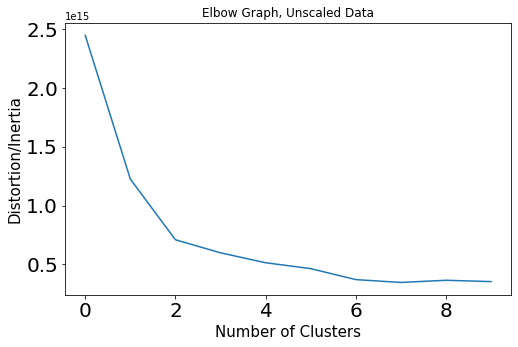

In [17]:
#Displaying Elbow Graph results

fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.set_xlabel('Number of Clusters',fontsize = 15) #xlabel
ax.set_ylabel('Distortion/Inertia',fontsize = 15) #ylabel
ax.tick_params(axis='x', which='major', labelsize=20)
ax.tick_params(axis='y', which='major', labelsize=20)
plt.title ('Elbow Graph, Unscaled Data')
plt.plot(sse)
plt.show()

In [18]:
kmeans = KMeans(
    init="random",
     n_clusters=2,
     n_init=10,
     max_iter=300,
     random_state=42
)
kmeans.fit(df[['2020 Gateway Community Pop.', '2020 Park County Pop.',
               '2022','Avg 2003-2022','Peak Month','Avg Month 2003-22','Peak/Average',
        'Size  (acres)', 'Have Roads Y/N?','Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings','rural', 'suburban', 'urban']])

C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

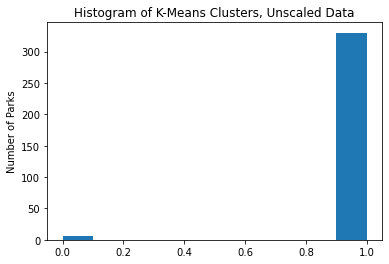

In [19]:
plt.hist(kmeans.labels_)
plt.title("Histogram of K-Means Clusters, Unscaled Data")
plt.xlabel("")
plt.ylabel("Number of Parks")
plt.show()

In [20]:
df['cluster'] = kmeans.labels_

In [21]:
df.head()

,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,Mar-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
0,Abraham Lincoln Birthplace National Historical...,Abraham Lincoln Birthplace,ABLI,SER,3235,14867,265707,1939,6534,14566,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,1
1,Acadia National Park,Acadia,ACAD,NER,2260,55478,3970260,8532,9154,20161,...,414808,NaN,NaN,NaN,1.0,NaN,1,0,0,1
2,Adams National Historical Park,Adams,ADAM,NER,101636,725981,12848,27,179,253,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,1
3,African Burial Ground National Monument,African Burial Ground,AFBG,NER,1694251,1694251,29743,96,1571,1395,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,1
4,Agate Fossil Beds National Monument,Agate Fossil Beds,AGFO,MWR,239,35872,16357,0,94,401,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,1


In [22]:
df.to_excel(r"C:\Users\Jonathan.Robison\DOT OST\volpe-proj-VU16A100 - Emerging Mobility\Subgroup Support\Traveler Information Technologies\Enhancing Trip Planning Information\NPS Park cluster result 24_01_22.xlsx")

In [23]:
df = df.sort_values(by=['cluster']).reset_index()

In [24]:
print(len(df.loc[df['cluster']==0]), " in cluster 0")
df.loc[df['cluster']==0]

6  in cluster 0


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
0,141,Gateway National Recreation Area,Gateway,GATE,NER,495747,9447805,8728291,504178,543132,...,0,NaN,NaN,NaN,1.0,NaN,0,0,1,0
1,162,Great Smoky Mountains National Park,Great Smoky Mountains,GRSM,SER,3577,345865,12937633,496743,421770,...,0,NaN,NaN,NaN,1.0,NaN,0,1,0,0
2,33,Blue Ridge Parkway,Blue Ridge Parkway,BLRI,SER,94589,269452,15711004,346381,472547,...,5138,NaN,NaN,NaN,1.0,NaN,0,1,0,0
3,153,Golden Gate National Recreation Area,Golden Gate,GOGA,PWR,873965,1136286,15638911,858993,1003946,...,1327939,NaN,NaN,NaN,NaN,NaN,0,0,1,0
4,253,Natchez Trace Parkway,Natchez Trace,NATR,SER,37923,833343,6543533,485642,472579,...,0,NaN,NaN,NaN,1.0,NaN,0,1,0,0
5,211,Lake Mead National Recreation Area,Lake Mead,LAKE,PWR,14885,2478728,5578226,847,805,...,0,NaN,NaN,NaN,1.0,NaN,1,0,0,0


In [25]:
print(len(df.loc[df['cluster']==1]), " in cluster 1")
df.loc[df['cluster']==1]

330  in cluster 1


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
6,263,Nicodemus National Historic Site,Nicodemus,NICO,MWR,14,2415,5307,6170,12537,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,1
7,262,Nez Perce National Historical Park,Nez Perce,NEPE,PWR,1169,42090,344517,14700,59754,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,1
8,261,New River Gorge National Park and Preserve,New River Gorge,NERI,NER,90,52447,1593523,3853,5903,...,0,NaN,NaN,NaN,NaN,NaN,0,1,0,1
9,260,New Orleans Jazz National Historical Park,New Orleans Jazz,JAZZ,SER,383997,383997,37410,400,3802,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,1
10,259,New Bedford Whaling National Historical Park,New Bedford Whaling,NEBE,NER,101079,579200,13570,26238,33155,...,0,NaN,NaN,NaN,NaN,NaN,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,122,Fort Point National Historic Site,Fort Point,FOPO,PWR,873965,873965,955454,40541,57164,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,1
332,121,Fort Necessity National Battlefield,Fort Necessity,FONE,NER,735,128804,258293,1607,2268,...,0,NaN,NaN,NaN,NaN,NaN,0,1,0,1
333,120,Fort McHenry National Monument and Historic Sh...,Fort McHenry,FOMC,NER,585708,585708,223957,486,18712,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,1
334,118,Fort Larned National Historic Site,Fort Larned,FOLS,MWR,3769,6253,26219,20,620,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,1


In [26]:
print(len(df.loc[df['cluster']==2]), " in cluster 2")
df.loc[df['cluster']==2]

0  in cluster 2


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster


In [27]:
#rerunning K-Means analysis on Cluster 1 of unscaled data

df_c1 = df.loc[df['cluster']==1]

In [28]:
df_c1.head()

df_c1.tail()

,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
331,122,Fort Point National Historic Site,Fort Point,FOPO,PWR,873965,873965,955454,40541,57164,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,1
332,121,Fort Necessity National Battlefield,Fort Necessity,FONE,NER,735,128804,258293,1607,2268,...,0,NaN,NaN,NaN,NaN,NaN,0,1,0,1
333,120,Fort McHenry National Monument and Historic Sh...,Fort McHenry,FOMC,NER,585708,585708,223957,486,18712,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,1
334,118,Fort Larned National Historic Site,Fort Larned,FOLS,MWR,3769,6253,26219,20,620,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,1
335,387,Zion National Park,Zion,ZION,IMR,514,245235,4692417,98828,102269,...,4383151,NaN,NaN,NaN,1.0,NaN,1,0,0,1


C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Jonathan.Robison\AppData\Roaming\Python\

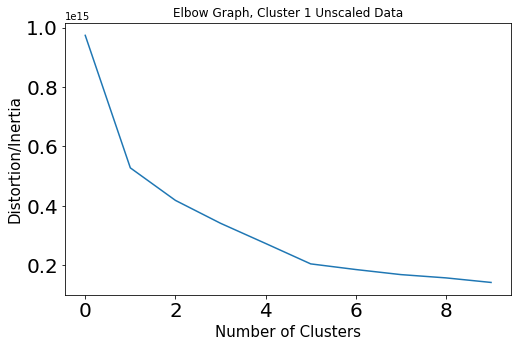

In [29]:
kmeans.fit(df_c1[['2020 Gateway Community Pop.', '2020 Park County Pop.',
               '2022','Avg 2003-2022','Peak Month','Avg Month 2003-22','Peak/Average',
        'Size  (acres)', 'Have Roads Y/N?','Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings','rural', 'suburban', 'urban']])

kmeans.labels_[:5]

#running Elbow Graph analysis on correct number of clusters

kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
     "random_state": 42,
   }
   
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_c1[['2020 Gateway Community Pop.', '2020 Park County Pop.',
               '2022','Avg 2003-2022','Peak Month','Avg Month 2003-22','Peak/Average',
        'Size  (acres)', 'Have Roads Y/N?','Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings','rural', 'suburban', 'urban']])
    sse.append(kmeans.inertia_)
    
sse

#Displaying Elbow Graph results

fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.set_xlabel('Number of Clusters',fontsize = 15) #xlabel
ax.set_ylabel('Distortion/Inertia',fontsize = 15) #ylabel
ax.tick_params(axis='x', which='major', labelsize=20)
ax.tick_params(axis='y', which='major', labelsize=20)
plt.title ('Elbow Graph, Cluster 1 Unscaled Data')
plt.plot(sse)
plt.show()

In [30]:
kmeans = KMeans(
    init="random",
     n_clusters=5,
     n_init=10,
     max_iter=300,
     random_state=42
)
kmeans.fit(df_c1[['2022', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19',
       'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19',
       'Dec-19', 'Avg 2003-2022','Peak Month','Avg Month 2003-22','Peak/Average',
        'Size  (acres)', 'Have Roads Y/N?','Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings','rural', 'suburban', 'urban']])

C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(init='random', n_clusters=5, n_init=10, random_state=42)

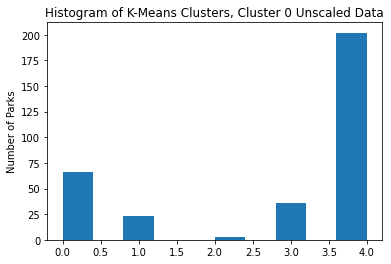

In [31]:
plt.hist(kmeans.labels_)
plt.title("Histogram of K-Means Clusters, Cluster 0 Unscaled Data")
plt.xlabel("")
plt.ylabel("Number of Parks")
plt.show()

In [32]:
df_c1.to_excel(r"C:\Users\Jonathan.Robison\DOT OST\volpe-proj-VU16A100 - Emerging Mobility\Subgroup Support\Traveler Information Technologies\Enhancing Trip Planning Information\NPS Park cluster result 24_01_22_subcluster.xlsx")

In [33]:
df_c1['cluster'] = kmeans.labels_

df_c1 = df_c1.sort_values(by=['cluster'])


<ipython-input-33-05258284f09c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c1['cluster'] = kmeans.labels_


In [34]:
print(len(df_c1.loc[df_c1['cluster']==0]), "in cluster C1.0")
df_c1.loc[df_c1['cluster']==0]

66 in cluster C1.0


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
124,359,Vanderbilt Mansion National Historic Site,Vanderbilt Mansion,VAMA,NER,1925,295911,326012,160,22763,...,0,NaN,NaN,NaN,NaN,NaN,0,1,0,0
210,47,Canyon de Chelly National Monument,Canyon de Chelly,CACH,IMR,4573,66021,354972,20409,20192,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,0
64,221,Little River Canyon National Preserve,Little River Canyon,LIRI,SER,14877,96579,726239,176,4841,...,0,NaN,NaN,NaN,NaN,NaN,0,1,0,0
61,203,Kings Canyon National Park,Kings Canyon,KICA,NaN,2053,1481771,640986,20295,9227,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,0
106,360,Vicksburg National Military Park,Vicksburg,VICK,SER,21573,44722,410487,38900,35128,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,95,Dinosaur National Monument,Dinosaur,DINO,IMR,243,13292,351019,1137,3189,...,350668,NaN,NaN,NaN,NaN,NaN,1,0,0,0
269,148,Gettysburg National Military Park,Gettysburg,GETT,NER,7106,103852,764576,13512,19119,...,0,NaN,NaN,NaN,1.0,NaN,0,1,0,0
256,165,Guilford Courthouse National Military Park,Guilford Courthouse,GUCO,SER,299035,541299,389057,1938,6354,...,0,NaN,NaN,NaN,NaN,NaN,0,1,0,0
258,161,Great Sand Dunes National Park and Preserve,Great Sand Dunes,GRSA,IMR,1072,16376,493428,4404,5154,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,0


In [35]:
print(len(df_c1.loc[df_c1['cluster']==1]), " in cluster 1")
df_c1.loc[df_c1['cluster']==1]

23  in cluster 1


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
178,69,Chattahoochee River National Recreation Area,Chattahoochee River,CHAT,SER,108080,1066710,3537848,204389,133850,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,1
179,60,Castle Clinton National Monument,Castle Clinton,CACL,NER,1694251,1694251,3471661,181143,193675,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,1
39,270,Olympic National Park,Olympic,OLYM,PWR,19960,251494,2432972,72725,73756,...,0,NaN,NaN,NaN,1.0,NaN,1,0,0,1
162,319,San Francisco Maritime National Historical Park,San Francisco Maritime,SAFR,PWR,873965,873965,3034750,34396,264354,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,1
255,166,Gulf Islands National Seashore,Gulf Islands,GUIS,SER,6302,188000,5685155,120594,299043,...,57529,NaN,NaN,NaN,NaN,NaN,0,1,0,1
186,50,Cape Hatteras National Seashore,Cape Hatteras,CAHA,SER,1600,41504,2862844,72767,72796,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,1
84,290,Point Reyes National Seashore,Point Reyes,PORE,PWR,895,262321,2336202,151683,164704,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,1
261,158,Grand Teton National Park,Grand Teton,GRTE,IMR,1611,23331,2806223,56635,43913,...,238920,NaN,NaN,NaN,1.0,NaN,1,0,0,1
215,18,Assateague Island National Seashore,Assateague Island,ASIS,NER,5026,85873,2340269,64032,43977,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,1
16,250,Mount Rushmore National Memorial,Mount Rushmore,MORU,MWR,240,109222,2440449,12933,11743,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,1


In [36]:
print(len(df_c1.loc[df_c1['cluster']==2]), " in cluster 2")
df_c1.loc[df_c1['cluster']==2]

3  in cluster 2


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
149,333,Statue of Liberty National Monument,Statue of Liberty,STLI,NER,1694251,1694251,3141213,155691,154755,...,6993087,NaN,NaN,NaN,NaN,NaN,0,0,1,2
335,387,Zion National Park,Zion,ZION,IMR,514,245235,4692417,98828,102269,...,4383151,NaN,NaN,NaN,1.0,NaN,1,0,0,2
263,156,Grand Canyon National Park,Grand Canyon,GRCA,IMR,0,358368,4732101,225056,213050,...,4348518,NaN,NaN,NaN,1.0,NaN,1,0,0,2


In [37]:
print(len(df_c1.loc[df_c1['cluster']==3]), " in cluster 3")
df_c1.loc[df_c1['cluster']==3]

36  in cluster 3


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
184,53,Capitol Reef National Park,Capitol Reef,CARE,IMR,231,2486,1227608,11893,12368,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,3
331,122,Fort Point National Historic Site,Fort Point,FOPO,PWR,873965,873965,955454,40541,57164,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,3
317,140,Gateway Arch National Park,Gateway Arch,JEFF,MWR,3015778,301578,1618774,18962,51416,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,3
305,105,Everglades National Park,Everglades,EVER,SER,80737,3077519,1155193,85838,96953,...,0,NaN,NaN,NaN,1.0,NaN,0,1,0,3
291,173,Hawai'i Volcanoes National Park,Hawai'i Volcanoes,HAVO,PWR,200629,200629,1580961,128836,120931,...,0,NaN,NaN,NaN,1.0,NaN,1,0,0,3
284,180,Hot Springs National Park,Hot Springs,HOSP,MWR,37930,100180,2646133,73964,79322,...,0,NaN,NaN,NaN,NaN,NaN,0,1,0,3
271,168,Haleakala National Park,Haleakala,HALE,PWR,7297,164754,1087616,53523,83666,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,3
250,26,Big Cypress National Preserve,Big Cypress,BICY,SER,375752,375752,2903159,86391,183754,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,3
240,38,Boston National Historical Park,Boston,BOST,NER,675647,797936,2123246,54898,82987,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,3
238,40,Bryce Canyon National Park,Bryce Canyon,BRCA,IMR,336,12750,2354660,36860,29813,...,586163,NaN,NaN,NaN,NaN,NaN,1,0,0,3


In [38]:
print(len(df_c1.loc[df_c1['cluster']==4]), " in cluster 4")
df_c1.loc[df_c1['cluster']==4]

202  in cluster 4


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
33,276,Paterson Great Falls National Historical Park,Paterson Great Falls,PAGR,NER,159732,524118,248293,6564,11456,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,4
262,157,Grand Portage National Monument,Grand Portage,GRPO,MWR,618,5600,93108,45,1178,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,4
34,275,Palo Alto Battlefield National Historical Park,Palo Alto Battlefield,PAAL,IMR,186738,421017,196252,10804,10433,...,0,NaN,NaN,NaN,NaN,NaN,0,1,0,4
264,155,Governors Island National Monument,Governors Island,GOIS,NER,1694251,1694251,44345,0,40,...,0,NaN,NaN,NaN,NaN,NaN,0,0,1,4
265,154,Golden Spike National Historical Park,Golden Spike,GOSP,IMR,30535,57666,49042,352,1047,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,83,Craters of the Moon National Monument and Pres...,Craters of the Moon,CRMO,PWR,879,2574,237774,102,5134,...,0,NaN,NaN,NaN,NaN,NaN,1,0,0,4
71,235,Martin Van Buren National Historic Site,Martin Van Buren,MAVA,NER,1170,61570,11702,405,2690,...,0,NaN,NaN,NaN,NaN,NaN,0,1,0,4
201,81,Cowpens National Battlefield,Cowpens,COWP,SER,12764,56216,212534,2041,19021,...,0,NaN,NaN,NaN,NaN,NaN,0,1,0,4
230,93,Devils Postpile National Monument,Devils Postpile,DEPO,PWR,7191,13195,144453,0,0,...,54013,NaN,NaN,NaN,NaN,NaN,1,0,0,4


In [39]:
print(len(df.loc[df['cluster']==7]), " in cluster 7")
df.loc[df['cluster']==7]

0  in cluster 7


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster


No handles with labels found to put in legend.


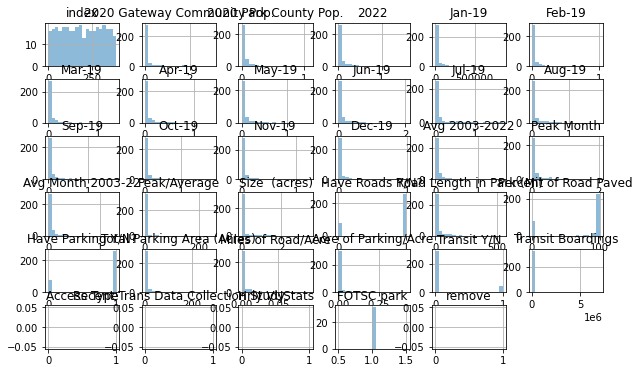

C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\extmath.py:1050: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\extmath.py:1055: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\extmath.py:1075: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count
No handles with labels found to put in legend.


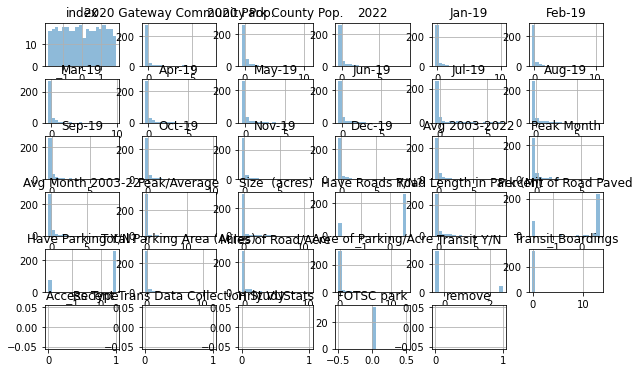

In [40]:
#standard scaling of data

import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

numerical_cols=df.select_dtypes(include=['float64','int64']).columns

df[numerical_cols].hist(alpha=0.5,bins=20, figsize=(10,6), label='Before Normalization')
plt.title('Histograms Before Normalization')
plt.legend()
plt.show()

scaler = StandardScaler()
df_scaled = df
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols].values)

df[numerical_cols].hist(alpha=0.5, bins=20, figsize=(10,6), label='After Normalization')
plt.title('Histogram After Normalization')
plt.legend()
plt.show()

In [41]:
kmeans = KMeans(
    init="random",
     n_clusters=10,
     n_init='auto',
     max_iter=300,
     random_state=42
)

In [42]:
kmeans.fit(df_scaled[['2020 Gateway Community Pop.', '2020 Park County Pop.',
               '2022','Avg 2003-2022','Peak Month','Avg Month 2003-22','Peak/Average',
        'Size  (acres)', 'Have Roads Y/N?','Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings','rural', 'suburban', 'urban']])

C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(init='random', n_clusters=10, n_init='auto', random_state=42)

In [43]:
df_scaled.head()

,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
0,-0.461607,Gateway National Recreation Area,Gateway,GATE,NER,0.893191,9.407968,4.546748,5.932193,5.586440,...,-0.127343,NaN,NaN,NaN,0.0,NaN,0,0,1,0
1,-0.272768,Great Smoky Mountains National Park,Great Smoky Mountains,GRSM,SER,-0.367246,-0.104404,6.949723,5.839568,4.251519,...,-0.127343,NaN,NaN,NaN,0.0,NaN,0,1,0,0
2,-1.432779,Blue Ridge Parkway,Blue Ridge Parkway,BLRI,SER,-0.134166,-0.184263,8.532949,3.966349,4.810041,...,-0.117445,NaN,NaN,NaN,0.0,NaN,0,1,0,0
3,-0.353699,Golden Gate National Recreation Area,Golden Gate,GOGA,PWR,1.861799,0.721659,8.491794,10.352500,10.655160,...,2.430754,NaN,NaN,NaN,NaN,NaN,0,0,1,0
4,0.545535,Natchez Trace Parkway,Natchez Trace,NATR,SER,-0.279286,0.405055,3.299542,5.701271,4.810393,...,-0.127343,NaN,NaN,NaN,0.0,NaN,0,1,0,0


In [44]:
kmeans.labels_[:5]

array([0, 0, 0, 0, 2])

In [45]:
kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
     "random_state": 42,
   }
   
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_scaled[['2020 Gateway Community Pop.', '2020 Park County Pop.',
               '2022','Avg 2003-2022','Peak Month','Avg Month 2003-22','Peak/Average',
        'Size  (acres)', 'Have Roads Y/N?','Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings','rural', 'suburban', 'urban']])
    sse.append(kmeans.inertia_)

C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Jonathan.Robison\AppData\Roaming\Python\

In [46]:
sse

[5913.267857142857,
 4728.999736227535,
 3900.412825702648,
 3609.658660029415,
 3289.810291436611,
 3132.399526245914,
 2802.68933569912,
 2714.7731460506534,
 2468.1655523250556,
 2338.121578313304]

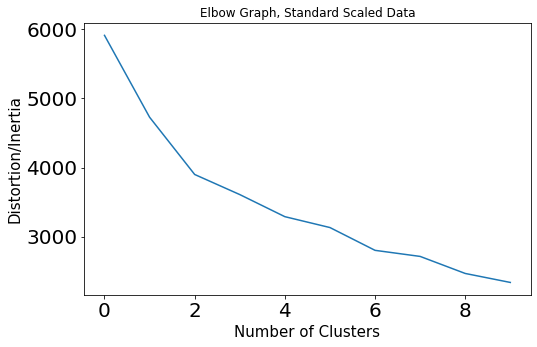

In [47]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.set_xlabel('Number of Clusters',fontsize = 15) #xlabel
ax.set_ylabel('Distortion/Inertia',fontsize = 15) #ylabel
ax.tick_params(axis='x', which='major', labelsize=20)
ax.tick_params(axis='y', which='major', labelsize=20)
plt.title('Elbow Graph, Standard Scaled Data')
plt.plot(sse)
plt.show()

In [48]:
kmeans = KMeans(
    init="random",
     n_clusters=6,
     n_init=10,
     max_iter=300,
     random_state=42
)
kmeans.fit(df_scaled[['2022', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19',
       'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19',
       'Dec-19', 'Avg 2003-2022','Peak Month','Avg Month 2003-22','Peak/Average',
        'Size  (acres)', 'Have Roads Y/N?','Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings','rural', 'suburban', 'urban']])

C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(init='random', n_clusters=6, n_init=10, random_state=42)

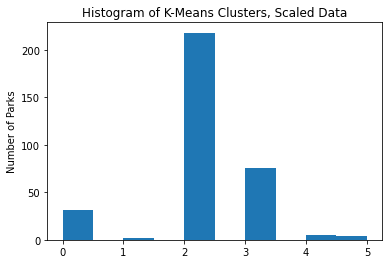

In [49]:
plt.hist(kmeans.labels_)
plt.title("Histogram of K-Means Clusters, Scaled Data")
plt.xlabel("")
plt.ylabel("Number of Parks")
plt.show()

In [50]:
df_scaled['cluster'] = kmeans.labels_

df_scaled = df_scaled.sort_values(by=['cluster'])

In [51]:
print(len(df_scaled.loc[df_scaled['cluster']==0]), " in cluster 0")
df_scaled[df_scaled['cluster']==0]

31  in cluster 0


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
335,1.750509,Zion National Park,Zion,ZION,IMR,-0.375090,-0.209572,2.242800,0.882319,0.737170,...,8.316210,NaN,NaN,NaN,0.0,NaN,1,0,0,0
191,-0.911224,Delaware Water Gap National Recreation Area,Delaware Water Gap,DEWA,NER,-0.354684,-0.024227,2.064580,1.282646,1.331451,...,-0.116875,NaN,NaN,NaN,0.0,NaN,0,1,0,0
195,-0.947193,Cuyahoga Valley National Park,Cuyahoga Valley,CUVA,MWR,-0.341487,0.855986,1.227168,0.747672,0.514893,...,0.066221,NaN,NaN,NaN,NaN,NaN,0,1,0,0
39,0.698405,Olympic National Park,Olympic,OLYM,PWR,-0.325289,-0.203031,0.952958,0.557126,0.423542,...,-0.127343,NaN,NaN,NaN,0.0,NaN,1,0,0,0
205,-1.037116,Colonial National Historical Park,Colonial,COLO,NER,-0.375840,-0.392662,1.140945,1.350966,0.789638,...,-0.127343,NaN,NaN,NaN,0.0,NaN,0,1,0,0
84,0.878252,Point Reyes National Seashore,Point Reyes,PORE,PWR,-0.374114,-0.191716,0.897715,1.540790,1.423924,...,-0.127343,NaN,NaN,NaN,NaN,NaN,1,0,0,0
208,-1.288902,Cape Cod National Seashore,Cape Cod,CACO,NER,-0.367274,-0.226543,1.829638,1.073600,1.058454,...,-0.023342,NaN,NaN,NaN,NaN,NaN,1,0,0,0
46,0.203826,Lava Beds National Monument,Lava Beds,LABE,PWR,-0.374096,-0.410710,-0.361180,0.866086,1.039326,...,-0.127343,NaN,NaN,NaN,NaN,NaN,1,0,0,0
281,-0.083929,Independence National Historical Park,Independence,INDE,NER,3.730883,1.210251,1.098717,0.394636,1.587530,...,-0.127343,NaN,NaN,NaN,NaN,NaN,0,0,1,0
280,-0.074936,Indiana Dunes National Park,Indiana Dunes,INDU,MWR,-0.363063,-0.284840,1.181994,0.522132,0.554942,...,-0.127343,NaN,NaN,NaN,NaN,NaN,0,1,0,0


In [52]:
print(len(df_scaled.loc[df_scaled['cluster']==1]), " in cluster 1")
df_scaled[df_scaled['cluster']==1]

2  in cluster 1


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
80,0.275765,Longfellow House-Washington's Headquarters Nat...,Longfellow House-Washington's Headquarters,LONG,NER,-0.073179,1.239728,-0.401376,2.920370,3.102534,...,-0.127343,NaN,NaN,NaN,NaN,NaN,0,0,1,1
48,0.185842,Lake Roosevelt National Recreation Area,Lake Roosevelt,LARO,PWR,-0.373305,-0.294865,0.208406,5.428053,5.467964,...,-0.127343,NaN,NaN,NaN,NaN,NaN,1,0,0,1


In [53]:
print(len(df_scaled.loc[df_scaled['cluster']==2]), " in cluster 2")
df_scaled[df_scaled['cluster']==2]

218  in cluster 2


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
165,1.112053,Salinas Pueblo Missions National Monument,Salinas Pueblo Missions,SAPU,IMR,-0.374142,-0.450142,-0.414716,-0.343666,-0.365386,...,-0.127343,NaN,NaN,NaN,NaN,NaN,1,0,0,2
217,-1.594642,Arches National Park,Arches,ARCH,IMR,-0.362664,-0.455761,0.397892,-0.081050,-0.055123,...,-0.127343,NaN,NaN,NaN,0.0,NaN,1,0,0,2
163,1.130037,San Antonio Missions National Historical Park,San Antonio Missions,SAAN,IMR,3.297637,1.634065,0.271313,0.877847,0.625921,...,-0.127343,NaN,NaN,NaN,NaN,NaN,0,1,0,2
218,-1.603634,Appomattox Court House National Historical Park,Appomattox Court House,APCO,NER,-0.371492,-0.449020,-0.388288,-0.347441,-0.362614,...,-0.127343,NaN,NaN,NaN,NaN,NaN,1,0,0,2
219,-1.612626,Apostle Islands National Lakeshore,Apostle Islands,APIS,MWR,-0.374911,-0.448914,-0.290402,-0.348886,-0.339075,...,-0.127343,NaN,NaN,NaN,NaN,NaN,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,0.500574,Morristown National Historical Park,Morristown,MORR,NER,-0.324726,0.066385,-0.295952,-0.274785,-0.366398,...,-0.127343,NaN,NaN,NaN,NaN,NaN,0,0,1,2
52,0.221811,Lincoln Boyhood National Memorial,Lincoln Boyhood,LIBO,MWR,-0.368139,-0.445162,-0.375537,-0.214115,-0.301490,...,-0.127343,NaN,NaN,NaN,NaN,NaN,1,0,0,2
17,0.509566,Mount Rainier National Park,Mount Rainier,MORA,PWR,-0.375630,0.496801,0.490226,0.279984,0.183819,...,-0.127343,NaN,NaN,NaN,0.0,NaN,1,0,0,2
126,1.282907,Stones River National Battlefield,Stones River,STRI,SER,0.014832,-0.108981,-0.197443,-0.275819,-0.208676,...,-0.127343,NaN,NaN,NaN,NaN,NaN,0,1,0,2


In [54]:
print(len(df_scaled.loc[df_scaled['cluster']==3]), " in cluster 3")
df_scaled[df_scaled['cluster']==3]

76  in cluster 3


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
50,0.149872,Lake Chelan National Recreation Area,Lake Chelan,LACH,NaN,-0.344596,-0.010786,-0.414135,-0.338334,-0.378882,...,-0.127343,NaN,NaN,NaN,NaN,NaN,1,0,0,3
279,-0.065944,Isle Royale National Park,Isle Royale,ISRO,MWR,-0.354930,-0.424682,-0.421415,-0.348836,-0.387330,...,-0.056181,NaN,NaN,NaN,NaN,NaN,1,0,0,3
278,-0.056951,James A. Garfield National Historic Site,James A. Garfield,JAGA,MWR,-0.254888,-0.222774,-0.417580,-0.348263,-0.358830,...,-0.127343,NaN,NaN,NaN,NaN,NaN,0,1,0,3
156,1.192984,Saugus Iron Works National Historic Site,Saugus Iron Works,SAIR,NER,-0.303114,0.380481,-0.420260,-0.347017,-0.383645,...,-0.127343,NaN,NaN,NaN,NaN,NaN,0,0,1,3
29,0.797321,Perry's Victory and International Peace Memorial,Perry's Victory,PEVI,MWR,-0.376012,-0.423681,-0.384004,-0.340215,-0.380411,...,-0.127343,NaN,NaN,NaN,NaN,NaN,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,-1.711542,Adams National Historical Park,Adams,ADAM,NER,-0.116119,0.292852,-0.428612,-0.348550,-0.385768,...,-0.127343,NaN,NaN,NaN,NaN,NaN,0,0,1,3
96,1.381823,Thomas Stone National Historic Site,Thomas Stone,THST,NER,-0.376360,-0.291735,-0.433194,-0.347541,-0.385900,...,-0.127343,NaN,NaN,NaN,NaN,NaN,0,1,0,3
234,-1.333864,Camp Nelson National Monument,Camp Nelson,CANE,SER,-0.296778,-0.410485,-0.426688,-0.348886,-0.387737,...,-0.127343,NaN,NaN,NaN,NaN,NaN,0,1,0,3
237,-1.360841,Buck Island Reef National Monument,Buck Island Reef,BUIS,SER,-0.153227,-0.374790,-0.410049,-0.302679,-0.347171,...,-0.127343,NaN,NaN,NaN,NaN,NaN,1,0,0,3


In [55]:
print(len(df_scaled.loc[df_scaled['cluster']==4]), " in cluster 4")
df_scaled[df_scaled['cluster']==4]

5  in cluster 4


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
192,-0.920216,Death Valley National Park,Death Valley,DEVA,PWR,-0.374214,-0.445992,0.208484,1.045844,0.854381,...,-0.127343,NaN,NaN,NaN,NaN,NaN,1,0,0,4
305,-0.785331,Everglades National Park,Everglades,EVER,SER,-0.169640,2.750428,0.223516,0.720489,0.678697,...,-0.127343,NaN,NaN,NaN,0.0,NaN,0,1,0,4
107,1.723532,Yellowstone National Park,Yellowstone,YELL,IMR,-0.376204,-0.254240,1.442345,0.073392,-0.039603,...,-0.127343,NaN,NaN,NaN,0.0,NaN,1,0,0,4
82,0.464604,Mojave National Preserve,Mojave,MOJA,PWR,-0.311319,1.814166,0.005598,-0.294270,-0.107470,...,-0.127343,NaN,NaN,NaN,NaN,NaN,1,0,0,4
5,0.167857,Lake Mead National Recreation Area,Lake Mead,LAKE,PWR,-0.338286,2.124635,2.748480,-0.338334,-0.378882,...,-0.127343,NaN,NaN,NaN,0.0,NaN,1,0,0,4


In [56]:
print(len(df_scaled.loc[df_scaled['cluster']==5]), " in cluster 5")
df_scaled[df_scaled['cluster']==5]

4  in cluster 5


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster
3,-0.353699,Golden Gate National Recreation Area,Golden Gate,GOGA,PWR,1.861799,0.721659,8.491794,10.352500,10.655160,...,2.430754,NaN,NaN,NaN,NaN,NaN,0,0,1,5
2,-1.432779,Blue Ridge Parkway,Blue Ridge Parkway,BLRI,SER,-0.134166,-0.184263,8.532949,3.966349,4.810041,...,-0.117445,NaN,NaN,NaN,0.0,NaN,0,1,0,5
1,-0.272768,Great Smoky Mountains National Park,Great Smoky Mountains,GRSM,SER,-0.367246,-0.104404,6.949723,5.839568,4.251519,...,-0.127343,NaN,NaN,NaN,0.0,NaN,0,1,0,5
0,-0.461607,Gateway National Recreation Area,Gateway,GATE,NER,0.893191,9.407968,4.546748,5.932193,5.586440,...,-0.127343,NaN,NaN,NaN,0.0,NaN,0,0,1,5


In [57]:
print(len(df_scaled.loc[df_scaled['cluster']==6]), " in cluster 6")
df_scaled[df_scaled['cluster']==6]

0  in cluster 6


,index,NPS Full Name,Simplified Name,Park Alpha,Region,2020 Gateway Community Pop.,2020 Park County Pop.,2022,Jan-19,Feb-19,...,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,rural,suburban,urban,cluster


In [ ]:
print(len(df_scaled.loc[df_scaled['cluster']==7]), " in cluster 7")
df_scaled[df_scaled['cluster']==7]

In [58]:
df_scaled.to_excel(r"C:\Users\Jonathan.Robison\DOT OST\volpe-proj-VU16A100 - Emerging Mobility\Subgroup Support\Traveler Information Technologies\Enhancing Trip Planning Information\NPS Park cluster result 25_01_22_scaledclusters.xlsx")

In [ ]:
#logarithmic scaling of data

import pandas as pd
import numpy as np

columns_to_log_scale = ['2012',
       '2016', '2019', '2022', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19',
       'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19',
       'Dec-19', 'Jan-22', 'Feb-22', 'Mar-22', 'Apr-22', 'May-22', 'Jun-22',
       'Jul-22', 'Aug-22', 'Sept-22', 'Oct-22', 'Nov-22', 'Dec-22',
       'Avg 2003-2022', 'Size  (acres)', 'Have Roads Y/N?',
       'Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings','rural', 'suburban', 'urban']

df_log = df
df_log[columns_to_log_scale] = np.log10(df_log[columns_to_log_scale].replace(0,1))

print(df_log)



In [ ]:
kmeans = KMeans(
    init="random",
     n_clusters=10,
     n_init='auto',
     max_iter=300,
     random_state=42
)

In [ ]:
df_log.head()

In [ ]:
df_log = df.fillna(0)

df_log.head()

In [ ]:
kmeans.fit(df_log[['2012','2016', '2019', '2022', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19',
       'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19',
       'Dec-19', 'Jan-22', 'Feb-22', 'Mar-22', 'Apr-22', 'May-22', 'Jun-22',
       'Jul-22', 'Aug-22', 'Sept-22', 'Oct-22', 'Nov-22', 'Dec-22',
       'Avg 2003-2022', 'Size  (acres)', 'Have Roads Y/N?',
       'Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings','rural', 'suburban', 'urban']])

In [ ]:
kmeans.labels_[:5]

In [ ]:
kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
     "random_state": 42,
   }
   
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_log[['2012',
       '2016', '2019', '2022', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19',
       'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19',
       'Dec-19', 'Jan-22', 'Feb-22', 'Mar-22', 'Apr-22', 'May-22', 'Jun-22',
       'Jul-22', 'Aug-22', 'Sept-22', 'Oct-22', 'Nov-22', 'Dec-22',
       'Avg 2003-2022', 'Size  (acres)', 'Have Roads Y/N?',
       'Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings', 'rural', 'suburban', 'urban']])
    sse.append(kmeans.inertia_)

In [ ]:
sse

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.set_xlabel('Number of Clusters',fontsize = 15) #xlabel
ax.set_ylabel('Distortion/Inertia',fontsize = 15) #ylabel
ax.tick_params(axis='x', which='major', labelsize=20)
ax.tick_params(axis='y', which='major', labelsize=20)
plt.title('Elbow Plot of K-Means Custers, Logarithmac Scaled Data')
plt.plot(sse)
plt.show()

In [ ]:
kmeans = KMeans(
    init="random",
     n_clusters=3,
     n_init=10,
     max_iter=300,
     random_state=42
)
kmeans.fit(df_log[['2012',
       '2016', '2019', '2022', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19',
       'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19',
       'Dec-19', 'Jan-22', 'Feb-22', 'Mar-22', 'Apr-22', 'May-22', 'Jun-22',
       'Jul-22', 'Aug-22', 'Sept-22', 'Oct-22', 'Nov-22', 'Dec-22',
       'Avg 2003-2022', 'Size  (acres)', 'Have Roads Y/N?',
       'Road Length in Park (Mi)', 'Percent of Road Paved',
       'Have Parking Y/N?', 'Total Parking Area (Acres)', 'Miles of Road/Acre',
       'Acre of Parking/Acre', 'Transit Y/N', 'Transit Boardings', 'rural', 'suburban', 'urban']])

In [ ]:
df_log['log_cluster'] = kmeans.labels_

In [ ]:
df_log = df_log.sort_values(by=['log_cluster'])

In [ ]:
df_log.head()

In [ ]:
plt.hist(kmeans.labels_)
plt.title("Histogram of K-Means Clusters, Logarithmic Scale")
plt.xlabel("")
plt.ylabel("Number of Parks")
plt.show()

In [ ]:
print(len(df_log.loc[df_log['log_cluster']==0]), " in cluster 0")
df_log.loc[df_log['log_cluster']==0]

In [ ]:
print(len(df_log.loc[df_log['log_cluster']==1]), " in cluster 1")
df_log.loc[df_log['log_cluster']==1]

In [ ]:
print(len(df_log.loc[df_log['log_cluster']==2]), " in cluster 2")
df_log.loc[df_log['log_cluster']==2]

In [ ]:
print(len(df_log.loc[df_log['log_cluster']==3]), " in cluster 3")
df_log.loc[df_log['log_cluster']==3]

In [ ]:
df_log.to_excel(r"C:\Users\Jonathan.Robison\DOT OST\volpe-proj-VU16A100 - Emerging Mobility\Subgroup Support\Traveler Information Technologies\Enhancing Trip Planning Information\NPS Park Cluster Log Result 01_03.xlsx")

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

#scoring the fit of the clusters

#Davies-Bouldin Index

db_index = davies_bouldin_score(df_log, kmeans.label_)
print(f"Davies-Bouldin Index: {db_index}")

In [ ]:
#Scoring the fit of the clusters

silhouette_avg = silhouette_score(df_log, kmeans.labels_)
print(f"Silhouette Score:{silhouette_avg}")